## Observations and Insights 

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID") 
# Display the data table for preview

merge_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [153]:
#check Mouse ID column

mouseCount=len(merge_df["Mouse ID"].unique())
mouseCount

249

In [154]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseDups=merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouseDups

array(['g989'], dtype=object)

In [155]:
# Optional: Get all the data for the duplicate mouse ID. 



In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"].isin(mouseDups) == False]

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [157]:
# Checking the number of mice in the clean DataFrame.
mouseCountClean=len(clean_df["Mouse ID"].unique())
mouseCountClean

248

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimenGrp = clean_df.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimenMean = regimenGrp["Tumor Volume (mm3)"].mean()
regimenMed = regimenGrp["Tumor Volume (mm3)"].median()
regimenVar = regimenGrp["Tumor Volume (mm3)"].var()
regimenStd = regimenGrp["Tumor Volume (mm3)"].std()
regimenSem = regimenGrp["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
sumStats = pd.DataFrame({"Mean": regimenMean, "Median": regimenMed, "Variance": regimenVar, "Standard Deviation": regimenStd, "SEM": regimenSem})
sumStats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sumStats2 = sumStats.groupby(['Drug Regimen']).agg({'Mean':'sum','Median':'sum','Variance':'sum','Standard Deviation':'sum','SEM':'sum'})
sumStats2


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

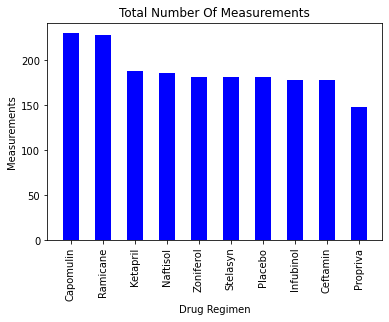

<Figure size 432x288 with 0 Axes>

In [160]:
drug_counts= clean_df["Drug Regimen"].value_counts()

#Creating variables for my axis
y_axis=drug_counts.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts.index

plt.bar(x_drugs, y_axis, color='b', align= "center", width = 0.5)
plt.xticks(rotation=90)

#set chart title
plt.title("Total Number Of Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")

#show chart and set layout
plt.show()
plt.tight_layout()


<AxesSubplot:xlabel='Drug Regimen'>

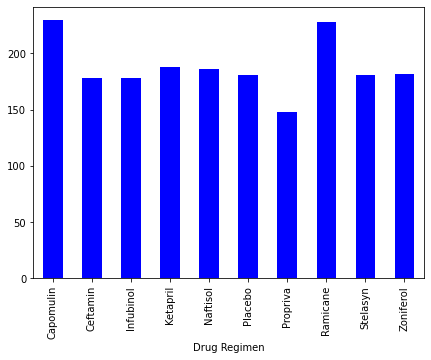

In [161]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

regimenMeasure.plot(kind="bar", figsize=(7,5), color='blue')


In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderCount=clean_df["Sex"].value_counts()



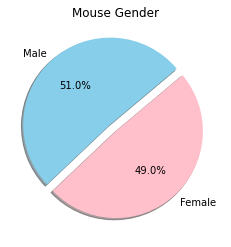

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=mf_count.index
sizes=mf_count.values
colors=["skyblue", "pink"]
explode=[0.1,0]

#Using Pandas to print
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=40, autopct="%1.1f%%")

#Formatting
plt.title("Mouse Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

greatestTimepoint=clean_df.groupby("Mouse ID").max().reset_index()

mergeMouse=greatestTimepoint[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

mergeMouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [165]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = clean_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = clean_df.loc[
    (clean_df['Tumor Volume (mm3)'] < lower_bound) |
    (clean_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 45.0
The upper quartile of occupancy is: 56.32407510749999
The interquartile range of occupancy is: 11.324075107499993
The the median of occupancy is: 48.933453655 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1605,k403,35,26.546993,1,Ramicane,Male,21,16
1628,k403,40,24.365505,1,Ramicane,Male,21,16
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1690,p189,40,74.106091,4,Ketapril,Male,8,28
1714,l725,40,73.693494,3,Naftisol,Female,8,26
1774,p189,45,75.294936,4,Ketapril,Male,8,28
1775,m650,45,73.901399,4,Ketapril,Male,15,27
1778,o331,45,78.567014,4,Ketapril,Male,24,30
1796,h246,45,74.104086,2,Ketapril,Male,13,30
1803,k382,45,73.715619,4,Ketapril,Male,22,29


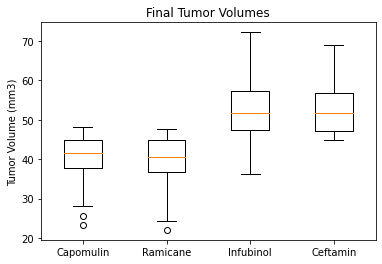

In [166]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=treatments)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

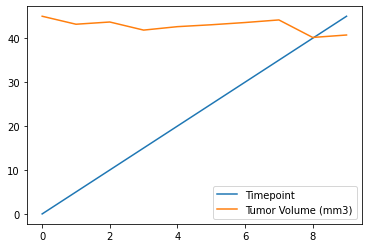

In [167]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capData = clean_df[clean_df["Mouse ID"].isin(["s710"])]
#capData

timeVtumor = capData[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
timeVtumor

linePlot = timeVtumor.reset_index()
linePlot

linePlot2 = linePlot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
linePlot2

lines = linePlot2.plot.line()

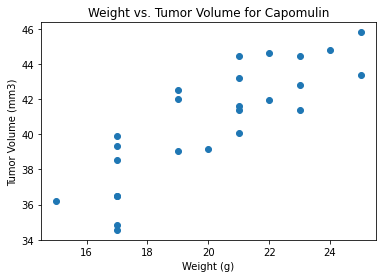

In [168]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinW= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

capAvg=capomulinW.groupby(["Mouse ID"]).mean()

plt.scatter(capAvg["Weight (g)"],capAvg["Tumor Volume (mm3)"] )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs. Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

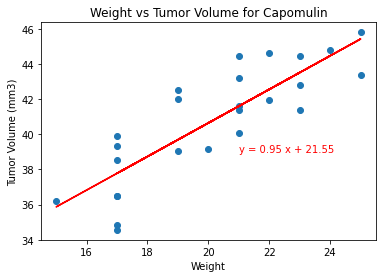

In [191]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(capAvg["Weight (g)"],capAvg["Tumor Volume (mm3)"])
regressValues=capAvg["Weight (g)"] * slope + intercept
lineEq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capAvg["Weight (g)"],capAvg["Tumor Volume (mm3)"] )
plt.plot(capAvg["Weight (g)"], regressValues, color='red')
plt.annotate(lineEq,(21,39), color='r', fontsize=10)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

In [193]:
 print(f"Correlation between the two variables of mouse weight and tumor volume is {round(rvalue,2)}")

Correlation between the two variables of mouse weight and tumor volume is 0.84
